# PCA and Autoencoders

Author: Ziyuan Li, 12211225

This assignment focuses on utilizing the PCA to reduce the dimensionality of data, and discussing the use of autoencoders.


# 1.  Implementing PCA


We use the same data preprocessing code from before that reads from the wine dataset.



In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


df = pd.read_csv('./data/wine.csv', header=None)
df.columns = ['Type', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',\
     'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']


# We do not discard the third class here
y = df.iloc[:,0]
X = df.iloc[:,1:]

df.head()


,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [26]:
# "Stratify" is used to ensure that the training and test sets have approximately the same percentage of samples of each target class as the complete set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Next we should standardize the data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train_std[:4])

[[ 0.98268636 -0.52764049  0.17359827 -1.08754344 -0.72766103  0.49145539
   0.79145985 -0.59671707  0.35458658  0.25541917  0.85746167  0.43782507
   1.86317967]
 [ 0.95793708 -0.74551086  1.25550363  0.83938558  0.06325176  1.13192275
   1.30655304 -0.59671707  1.3432327   0.29758662  1.03209459  0.15956344
   1.74910798]
 [ 0.40107814 -0.61289411  1.77780276 -1.23576875  0.65643635  0.49145539
   0.707363   -0.17049059 -0.42592352 -0.16625539  0.59551231  0.26208088
   0.42913559]
 [ 0.77231743 -0.59394886 -0.01293713 -0.16854652  0.39279876  0.90775917
   1.24348041 -1.19343414  0.59741194  0.80359609  0.59551231  0.40853438
   2.49872194]]


$C=\frac{1}{N}\sum_{n=1}^N(x^{(n)}-\bar{x})(x^{(n)}-\bar{x})^T=U\Sigma U^T\approx U_{1:M}\Sigma_{1:M}U_{1:M}^T$

We have already normalized the X matrix.
Next we will calculate the covariance matrix using the method given by numpy, and decompose it into eigenvalues and eigenvectors, which are the "principle components" of our data.


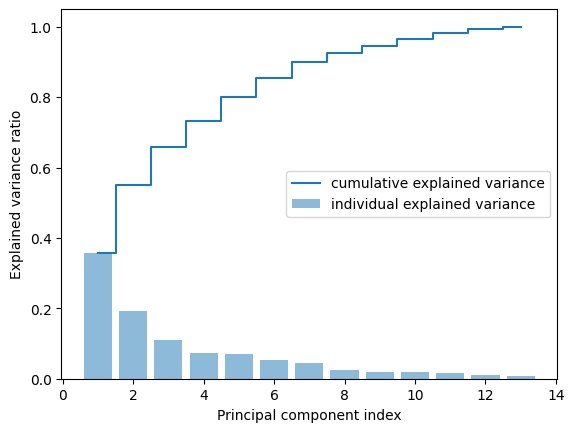

In [27]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)


tot = sum(eigen_vals) # Total sum of eigenvalues
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)] # Explained variance, accumulative. The highest explanations sit at front.
cum_var_exp = np.cumsum(var_exp) # uses numpy to calculate the cumulative sum of explained variances

plt.bar(range(1, 14), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

- Eigenvalues represent the amount of variance captured by each principal component. They indicate how much information (variance) is contained along each new axis after the transformation. 
A larger eigenvalue indicates that the corresponding principal component captures more variance, meaning it explains more of the variability in the dataset.
- Eigenvectors are the directions or axes in the transformed space. Each eigenvector corresponds to one principal component and points in the direction of maximum variance.


In [28]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))] # The eigenvectors are shaped in columns. There are 13 features, then there are 13 vectors.

eigen_pairs.sort(key=lambda k: k[0], reverse=True) # Sort the eigenvalues in descending order

for i in range(1,5):
    print(eigen_pairs[i])

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis])) # Stack the two most informative eigenvectors into a 13x2 matrix, it is used to project the original high-dimensional data onto the 2D space spanned by the selected principal components.

print('Matrix W:\n', w)
X_train_pca = X_train_std.dot(w) # reconstructing the data using two principle comps
X_test_pca = X_test_std.dot(w)



(2.517493700893585, array([-0.49414675, -0.1670862 , -0.33581955,  0.0230456 , -0.2816766 ,
       -0.07164769, -0.00569565, -0.04855187, -0.00589032, -0.52633004,
        0.28399523,  0.18136641, -0.3703045 ]))
(1.4425112439605554, array([-0.13550025,  0.08484512,  0.61436922,  0.62199483,  0.08744449,
        0.18025489,  0.1288233 ,  0.22290079,  0.16925303, -0.15886766,
        0.14029634,  0.13133987, -0.11347494]))
(0.9502568705615343, array([ 0.22002101, -0.34863385,  0.21029079, -0.11850515, -0.54616385,
        0.01134185,  0.01728643,  0.43279572, -0.38816555,  0.05280192,
        0.29582335,  0.05170014,  0.20518301]))
(0.9138815593826501, array([ 0.1001375 ,  0.51191077, -0.10967198, -0.01880619, -0.60714326,
        0.28882326,  0.23108185,  0.03104048,  0.17123031,  0.08025659,
       -0.32935599,  0.21901727, -0.13011228]))
Matrix W:
 [[ 0.15763477 -0.49414675]
 [-0.25237011 -0.1670862 ]
 [-0.01662626 -0.33581955]
 [-0.23514225  0.0230456 ]
 [ 0.14285062 -0.2816766 ]
 [ 

In [38]:
X_PCA_reconstructed = X_test_pca.dot(w.T) # Reconstruct the original data from the 2D projection
reconstruction_error = np.mean((X_PCA_reconstructed - X_test_std) ** 2)

print('Reconstruction error:', reconstruction_error)



Reconstruction error: 0.4651991758956819


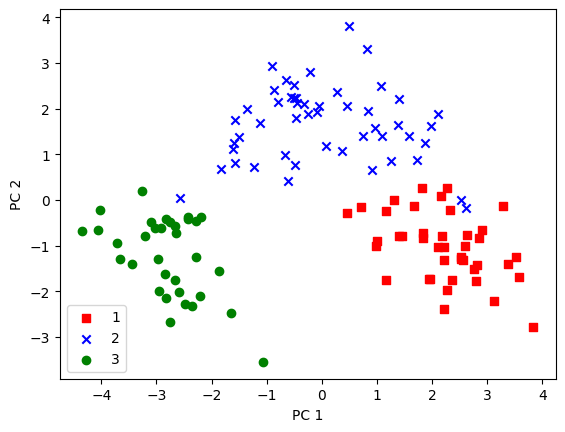

In [30]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()


The X data is visualized in 2 dimensions, which are the results from the PCA. 

# 2. Training a Linear Autoencoder


The wine dataset has 13 features (and typically one target variable that is not used in the autoencoder itself).

The structure of the MLP in an autoencoder consists of an encoder and a decoder, with a bottleneck layer (also known as the latent space or code) in between.

In [31]:
from models.MLP import Linear, ReLU, Sigmoid, MLP

class AutoEncoder(MLP):
    def __init__(self, layers, epochs=500, lr=0.01, input_shape=13, output_shape=13):
        super().__init__(layers, epochs, lr, input_shape, output_shape)
        self.threshold = 0.5
        
    def get_loss(self, x_pred, x_true):
        x_pred = x_pred.reshape(-1, self.output_shape)
        x_true = x_true.reshape(-1, self.output_shape)

        # MSE loss for reconstruction
        return np.mean((x_pred - x_true) ** 2)


    def get_loss_grad(self, x_pred, x_true):
        # The loss here is similar to MSE, and the grad is alike.
        x_pred = x_pred.reshape(-1, self.output_shape)
        x_true = x_true.reshape(-1, self.output_shape)

        return (x_pred - x_true) / self.output_shape

    
    def predict(self, X):
        # Forward pass
        x_recon = self.forward(X)
        
        # Convert the output to binary
        return x_recon
        


The loss here is an MSE loss with a constant.

In [32]:
linear_layers = [
        Linear(input_size=13, output_size=4),
        Linear(4,4),
        Linear(input_size=4, output_size=13)
    ]

epochs = 5000
# epochs = 100000
lr = 1

autoencoder = AutoEncoder(linear_layers, epochs=epochs, lr=lr, input_shape=13, output_shape=13)
autoencoder.train_BGD(X_train_std, X_train_std)


Training BGD: 100%|██████████| 5000/5000 [00:00<00:00, 11353.35it/s]


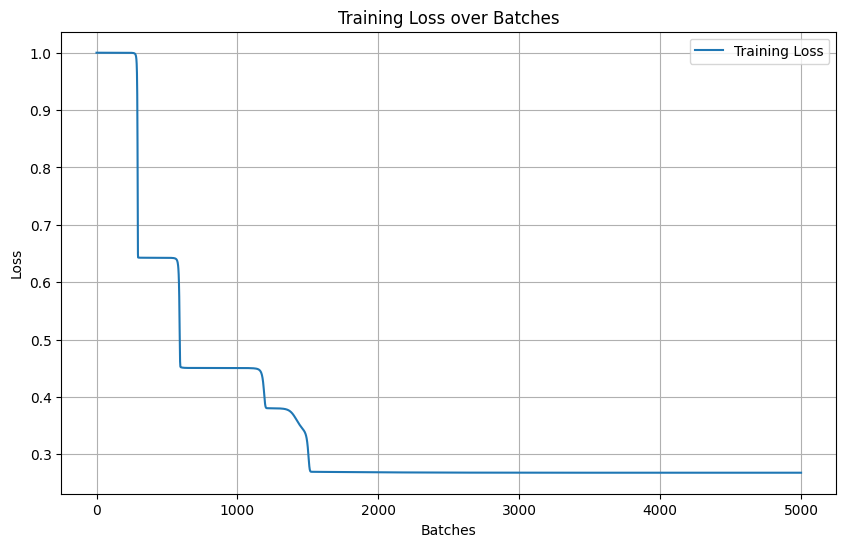

In [33]:
loss_history = autoencoder.loss
length = len(loss_history)

# Plot the loss history
plt.figure(figsize=(10, 6))
plt.plot(range(length), loss_history, label='Training Loss')
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.title('Training Loss over Batches')
plt.legend()
plt.grid(True)
plt.show()

The linear encoder converges at after 3000 epochs with the hyperparams chosen above.

[[ 0.71834457 -0.294039    0.85246799  0.02165293  0.88953951  1.24056024
   1.21230772 -0.57771789  1.063086    0.14593187  0.53316363  0.88991338
   0.94978094]]
[[ 0.25258243  0.06913488  1.14358238 -0.31677183  0.06325176  0.81168907
   1.29604094 -0.51147177  2.08905346  0.28915313  0.33356294  0.8332495
   1.42318887]]
Reconstruction Error: 0.29706032259587734


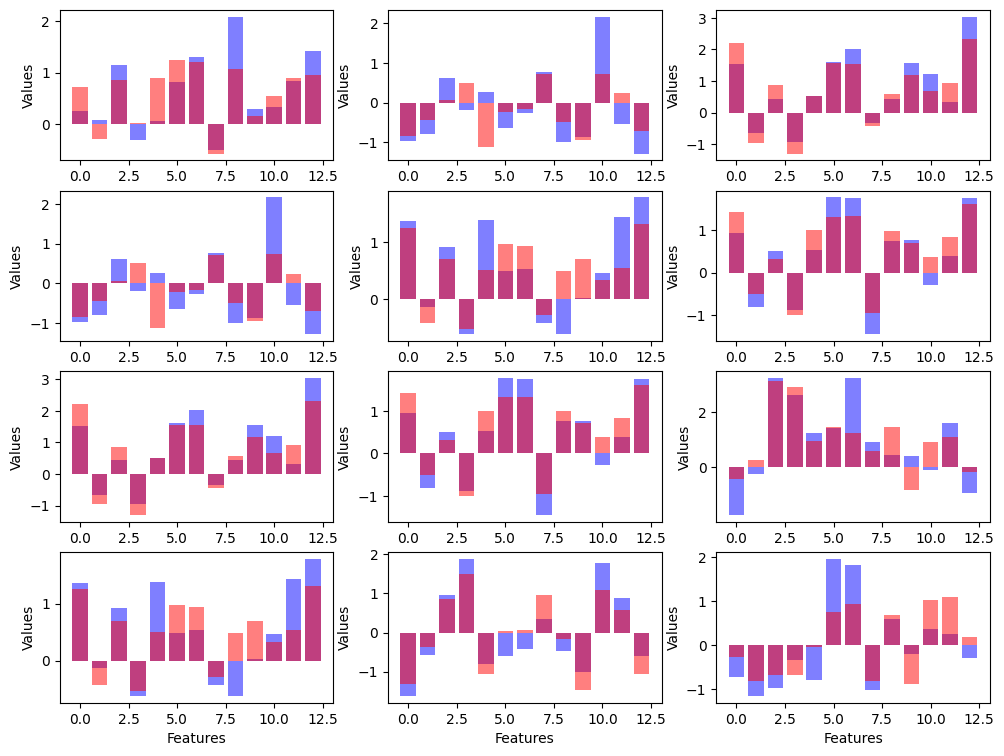

In [34]:
# Predict the reconstructed values for the test set
X_test_reconstructed = autoencoder.predict(X_test_std)

print(X_test_reconstructed[:1])
print(X_test_std[:1])
print("Reconstruction Error:" , autoencoder.get_loss(X_test_reconstructed, X_test_std))

# Visualize the original data and reconstructed data using bar charts
fig, ax = plt.subplots(figsize=(12,9), nrows=4, ncols=3)

for i in range(1,5):
    for j in range(1,4):
        ax[i-1, j-1].bar(range(X_test_std.shape[1]), X_test_std[i*j-1], color='blue', alpha=0.5, label='Original Data')
        ax[i-1, j-1].bar(range(X_test_reconstructed.shape[1]), X_test_reconstructed[i*j-1], color='red', alpha=0.5, label='Reconstructed Data')
        ax[i-1, j-1].set_xlabel('Features')
        ax[i-1, j-1].set_ylabel('Values')

plt.show()


# 3. Nonlinear Autoencoder


In [58]:
nonlinear_layers = [
        Linear(input_size=13, output_size=4),
        ReLU(),
        Linear(4,4),
        # ReLU(),
        Linear(input_size=4, output_size=13)
    ]

epochs = 20000
# epochs = 100000
lr = 1e-1

nonlin_autoencoder = AutoEncoder(nonlinear_layers, epochs=epochs, lr=lr, input_shape=13, output_shape=13)
nonlin_autoencoder.train_BGD(X_train_std, X_train_std)

Training BGD: 100%|██████████| 20000/20000 [00:01<00:00, 10420.47it/s]


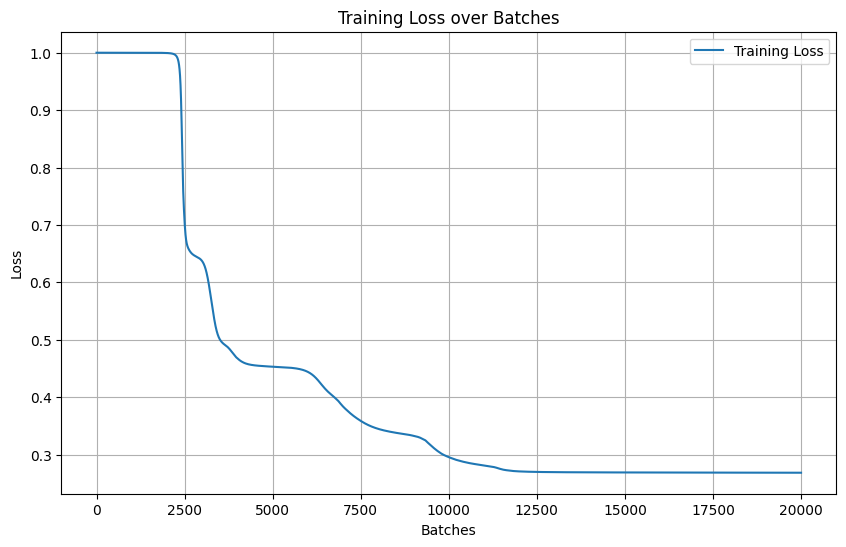

In [59]:
loss_history = nonlin_autoencoder.loss
length = len(loss_history)

# Plot the loss history
plt.figure(figsize=(10, 6))
plt.plot(range(length), loss_history, label='Training Loss')
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.title('Training Loss over Batches')
plt.legend()
plt.grid(True)
plt.show()

[[ 0.69245163 -0.1221858   0.7854975   0.04045636  0.88933509  1.29293974
   1.25243912 -0.66294598  1.17822026  0.15166809  0.40709082  0.91968058
   0.88262982]]
[[ 0.25258243  0.06913488  1.14358238 -0.31677183  0.06325176  0.81168907
   1.29604094 -0.51147177  2.08905346  0.28915313  0.33356294  0.8332495
   1.42318887]]
Reconstruction Error: 0.2852651718307722


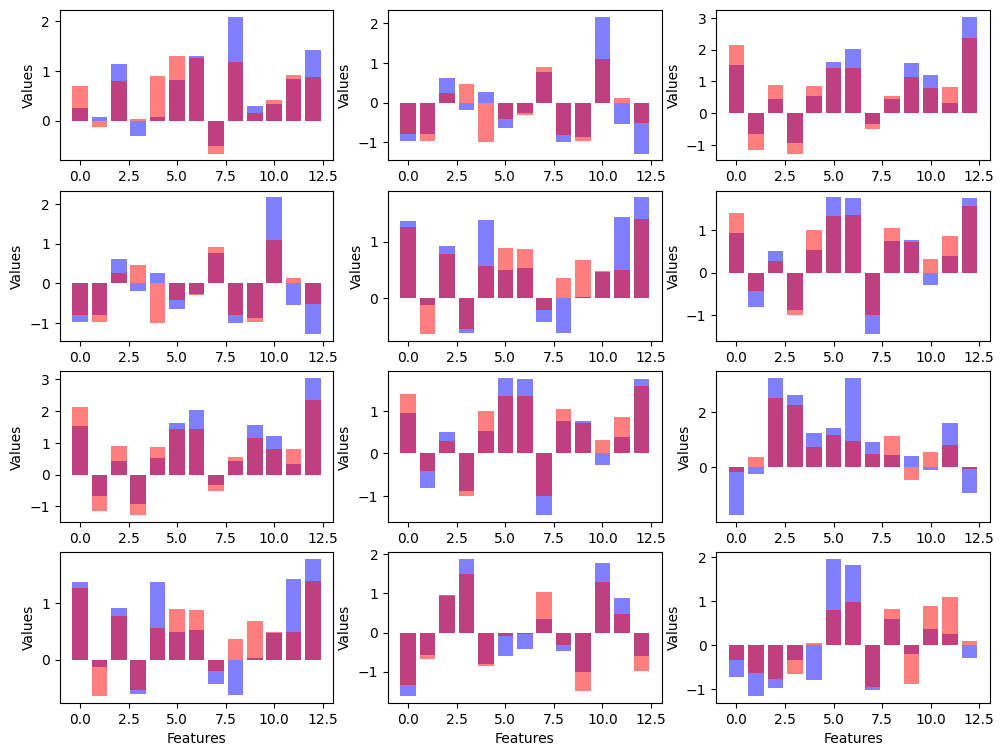

In [60]:
# Predict the reconstructed values for the test set
X_test_reconstructed = nonlin_autoencoder.predict(X_test_std)

print(X_test_reconstructed[:1])
print(X_test_std[:1])
print("Reconstruction Error:" , nonlin_autoencoder.get_loss(X_test_reconstructed, X_test_std))

# Visualize the original data and reconstructed data using bar charts
fig, ax = plt.subplots(figsize=(12,9), nrows=4, ncols=3)

for i in range(1,5):
    for j in range(1,4):
        ax[i-1, j-1].bar(range(X_test_std.shape[1]), X_test_std[i*j-1], color='blue', alpha=0.5, label='Original Data')
        ax[i-1, j-1].bar(range(X_test_reconstructed.shape[1]), X_test_reconstructed[i*j-1], color='red', alpha=0.5, label='Reconstructed Data')
        ax[i-1, j-1].set_xlabel('Features')
        ax[i-1, j-1].set_ylabel('Values')

plt.show()


The results of the autoencoder with ReLU layer integrated is a little better than the original one, yet not significantly better.



# 4. Summary and Notes


The reconstruction loss is nonlinear autoencoder < linear autoencoder < PCA reconstruction. (Although the differences between nonlinear and linear autoencoder is small enough to be easily affected by the tweaking of hyperparameters)

The PCA is the most efficient in terms of computation time, but the autoencoders are more flexible and can be used for more complex data. 

The number of hidden layer's neurons can largely affect the performance of the autoencoder. In our case, the setting with only two neurons is not capable of reconstructing a good result. We use 4 neurons to achieve a balance of performance and compression.

Also, during the training process we notice that too deep autoencoders are hard to train. Very often deep autoencoders (with 5 to 6 layers in our case) would be stuck at providing very small predictions. This is because the gradients are too small to update the weights, namely the vanishing gradient problem.